# Churn Prediction - Como Antecipar a Evas√£o de Clientes com Machine Learning

Em mercados competitivos, a reten√ß√£o do cliente √© t√£o importante quanto a sua conquista. *Churn rate*, ou simplesmente *churn*, representa a taxa de evas√£o da sua base de clientes. Em servi√ßos como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

*Por que isso importa?* Reter clientes custa menos do que consquist√°-lo - `Custo de Aquisi√ß√£o de Cliente (CAC)`. Um alto *churn* pode indicar problemas na experi√™ncia do cliente, na proposta de valor, ou na concorr√™ncia. Ou seja, um alto valor para o *churn rate* √© o que n√£o desejamos.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Com modelos de machine learning, √© poss√≠vel identificar padr√µes comportamentais que antecedem o cancelamento. Isso permite que empresas atuem proativamente, oferecendo incentivos, promo√ß√µes ou mudan√ßas no servi√ßo para evitar perdas.

## Fonte dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma do Kaggle, e tratam de um problema t√≠pico de uma companhia de telecomunica√ß√µes. O *dataset* completo pode ser encontrado [neste link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

Cada registro representa um cliente, com atributos como:

* Tipo de servi√ßo (Internet, Telefone, Etc).

* Forma de Pagamento.

* Tempo como cliente.

* Indicador de *Churn* (Vari√°vel Alvo).

In [2]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="paper", style="white")
sns.color_palette("Spectral", n_colors=5)

# Importando Dados
PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(PATH)

# Conferindo o Dataset
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## An√°lise Explorat√≥ria dos Dados

Antes de aplicar qualquer tipo de modelo preditivo, √© crucial entender a estrutura e os padr√µes presentes nos dados. Nesta etapa, exploramos as vari√°veis, tratamos inconsist√™ncias e extra√≠mos insights preliminares que ajudam na modelagem posterior.

In [3]:
print("Dimens√µes do Dataset")
print("Linhas: \t\t{}".format(df.shape[0]))
print("Colunas: \t\t{}".format(df.shape[1]))

Dimens√µes do Dataset
Linhas: 		7043
Colunas: 		21


In [4]:
print("Dados Ausentes (total): {}\n".format(df.isnull().sum().values.sum()))
print(df.isnull().sum() / df.shape[0])

Dados Ausentes (total): 0

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [5]:
print("Nome das Features do Dataset: \n {} \n".format(df.columns.values))

Nome das Features do Dataset: 
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn'] 



In [6]:
print("Valores √∫nicos por coluna: \n{}".format(df.nunique()))

Valores √∫nicos por coluna: 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
print("Tipo de vari√°veis de cada coluna: \n{}".format(df.dtypes))

Tipo de vari√°veis de cada coluna: 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
df.loc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

**Observa√ß√µes Iniciais** 

*   A coluna `customerID` √© apenas um identificador √∫nico, sem valor preditivo e ser√° removida.

*   A vari√°vel alvo √© `Churn`, indicando se o cliente deixou ou n√£o a operadora

*   A coluna `TotalCharges` deveria ser num√©rica, mas encontra-se como object - ser√° convertida para float. 

Ap√≥s essa convers√£o, realizamos uma nova verifica√ß√£o de dados ausentes, que podem ter sido mascarados pelo tipo incorreto em que se encontra.

*   Muitas colunas apresentam dados bin√°rios (`Yes/No`), que precisam ser transformados em valores num√©ricos ao longo do pr√©-processamento.

### Limpeza e Pr√©-processamento Inicial dos Dados

In [9]:
# Criando c√≥pia do Dataframe
df_clean = df.copy()

# Remover a coluna "costumerID"
df_clean.drop("customerID", axis=1, inplace=True)

# Converter strings para float
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

In [10]:
# Verificando valores ausentes
ausentes = df_clean["TotalCharges"].isnull().sum()

print("Valores ausentes em TotalCharges: \t{ausentes}")

Valores ausentes em TotalCharges: 	{ausentes}


Durante a convers√£o da coluna `TotalCharges` de string para float, identificamos valores ausentes. 

Decidimos substitu√≠-los pela mediana, uma estrat√©gia robusta contra outliers.

In [11]:
# Substituindo valores ausentes pela mediana
df_clean["TotalCharges"] = df_clean["TotalCharges"].fillna(df_clean["TotalCharges"].median())

In [12]:
print("Valores ausentes em TotalCharges: \t{}".format(df_clean["TotalCharges"].isnull().sum()))

Valores ausentes em TotalCharges: 	0


### Continuando a An√°lise Explorat√≥ria

Embora o Dataset seja composto majoritariamente por vari√°veis categ√≥ricas, tamb√©m utilizamos o m√©todo `describe()` para uma an√°lise estat√≠stica das vari√°veis num√©ricas. Isso nos ajuda a identificar: 

* Poss√≠veis `outliers`.

* Distribui√ß√µes enviesadas.

* Necessidade de normaliza√ß√£o ou padroniza√ß√£o.

In [13]:
df_clean.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

Atrav√©s do resultado do `describe()`, notamos que o crescimento dos resultados apresentam uma amplitude normal, o que pode indicar que os dados n√£o apresentam outliers.

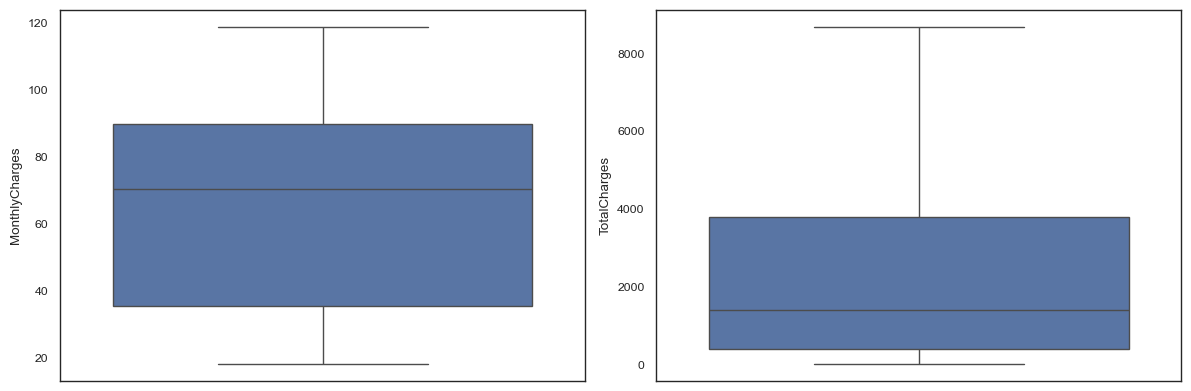

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(df_clean["MonthlyCharges"], ax=ax[0])
sns.boxplot(df_clean["TotalCharges"], ax=ax[1])
plt.tight_layout()

Analisando o `boxplot` para as colunas `MonthlyCharge` e `TotalCharges`, confirma-se que n√£o h√° presen√ßa de outliers nos dados.

--- 

A vari√°vel `SeniorCitizen` √© uma vari√°vel bin√°ria, que indica se o cliente √© Idoso ou n√£o, vemos que 16% dos clientes s√£o idoso.

In [15]:
print("O total de Idosos assinantes √© de {}.".format(round(df_clean["SeniorCitizen"].value_counts(normalize=False))[1]))
print("Referente √† {:.2f}% do total de clientes.".format((df_clean["SeniorCitizen"].value_counts(normalize=True)*100)[1]))

O total de Idosos assinantes √© de 1142.
Referente √† 16.21% do total de clientes.


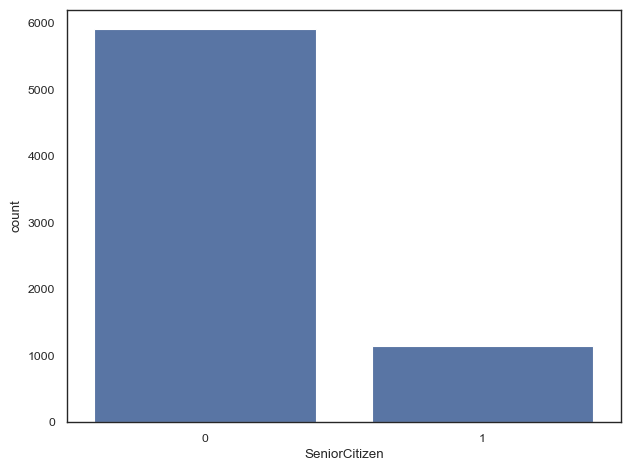

In [16]:
sns.countplot(data=df_clean, x="SeniorCitizen")
plt.tight_layout()

A vari√°vel `tenure` indica o tempo de perman√™ncia de um cliente assinante, pode-se dizer que √© um indicativo de fidelidade. Apensar de n√£o haver nenhum indicativo da m√©trica, vamos assumir que a unidade de tempo utilizada √© `M√™s`.

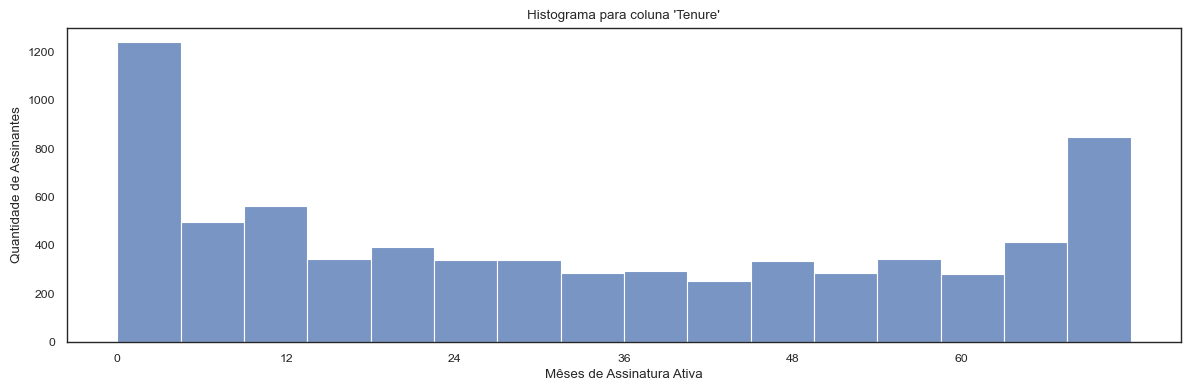

In [17]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(df_clean["tenure"])
plt.xticks(range(0,70,12))
plt.xlabel("M√™ses de Assinatura Ativa")
plt.ylabel("Quantidade de Assinantes")
plt.title("Histograma para coluna 'Tenure'")
plt.tight_layout()

Atrav√©s do histograma da vari√°vel `tenure`, observamos que o primeiro ano de assinatura √© crucial para a reten√ß√£o dos cliente, ap√≥s esse per√≠odo a tend√™ncia √© de que permane√ßam com a assinatura ativa. 

### Analisando Vari√°veis Categ√≥ricas

Grande parte das vari√°veis presentes neste dataset s√£o categ√≥ricas, representadas como textos. Isso inclui colunas como `gender`, `InternetService`, `Contract`, `PaymentMethod`, entre outras.

#### Objetivo 

Entender a distribui√ß√£o e poss√≠veis correla√ß√µes com o `Churn`. Por exemplo, cliente com contratos mensais ou com servi√ßos de Internet mais inst√°veis podem ter maior probabilidade de evas√£o.

Lidando com vari√°veis categ√≥ricas, √© importante conferir os valores √∫nicos, pois permite identificar como os dados s√£o constitu√≠dos, identificar labels diferentes por√©m com o mesmo significado.

In [18]:
np.unique(df_clean.select_dtypes("object").values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

In [19]:
df_clean.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

O gr√°fico abaixo mostra as vari√°veis categ√≥ricas com maior separa√ß√£o entre o resultado de `Churn`. De acordo com cada uma dessas vari√°veis, os clientes que apresentam os maiores √≠ndices de Churn s√£o:

* `Contract`: Contratos de renova√ß√£o mensal.

* `InternetService`: Clientes com fibra √≥ptica.

* `PaymentMethod`: Clientes com pagamento do tipo "Cheque Eletr√¥nico".

* `TechSupport`: Clientes sem suporte t√©cnico.

* `OnlineSecurity`: Clientes sem seguran√ßa online.

* `DeviceProtection`: Clientes que n√£o optaram por algum tipo de prote√ß√£o (Antiv√≠rus)

* `StreamingTV`: Pequena diferen√ßa, mas a maioria dos cancelamentos s√£o de clientes que n√£o utilizam TV por Streaming.

* `StreamingMovies`: Assim como o anterior, a maioria dos cancelamentos s√£o de clientes que n√£o assistem Filmes por Streaming.

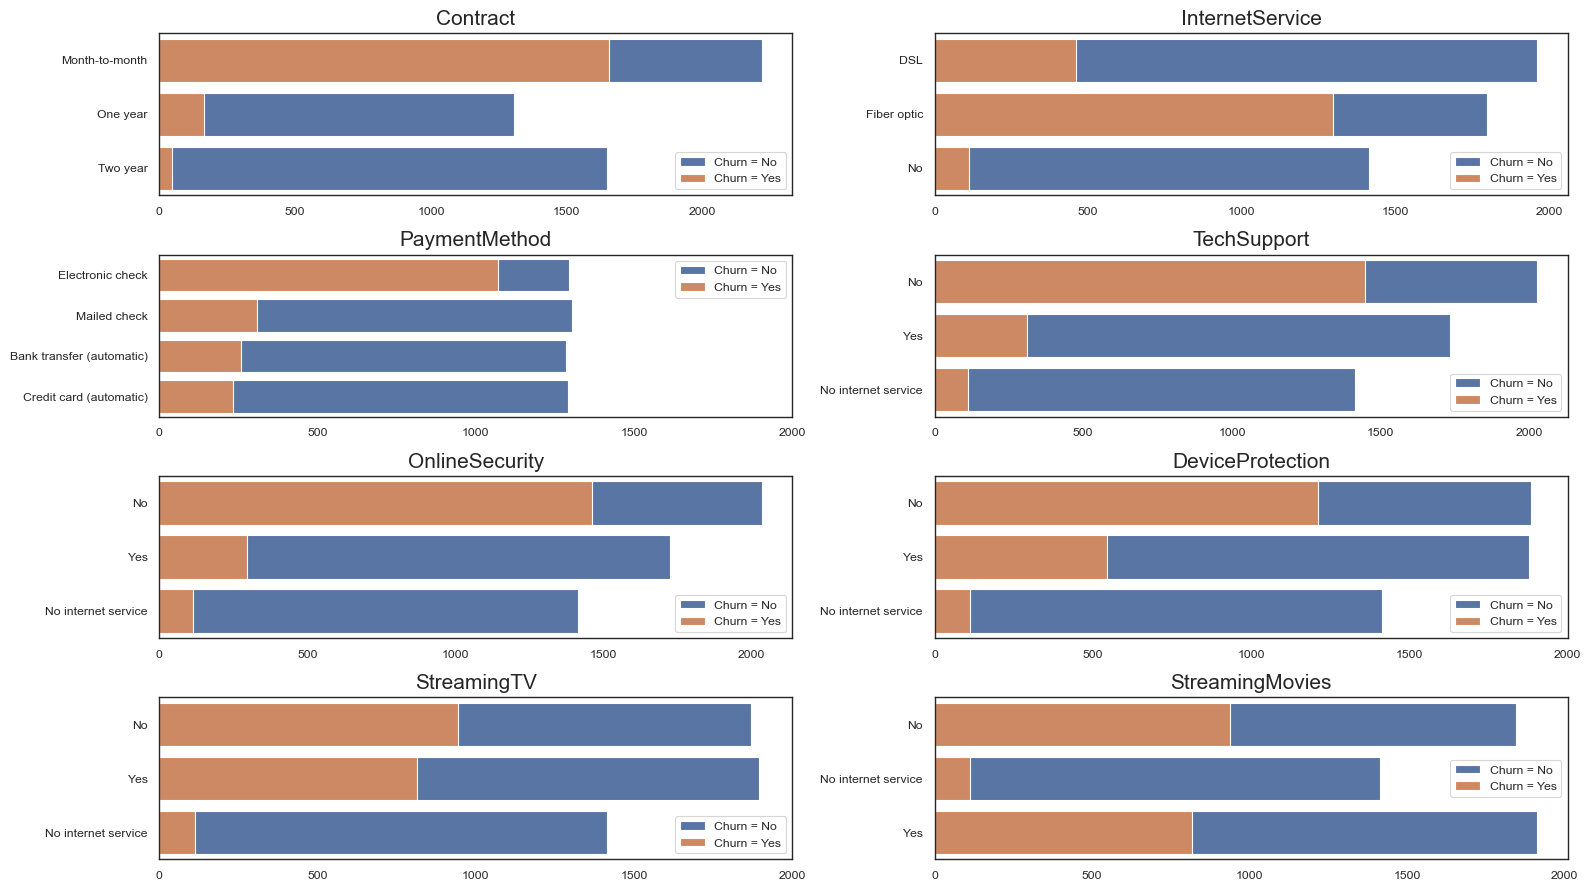

In [20]:
# Criando plot com as vari√°veis categ√≥ricas com maior separa√ß√£o entre a classe Churn

df_class_0 = df_clean[df_clean.Churn == "No"]
df_class_1 = df_clean[df_clean.Churn == "Yes"]

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,9))
fig.subplots_adjust(hspace=3, wspace=3)
sns.color_palette("muted")

# Vari√°veis mais informativas
selected_cols = [
    "Contract", "InternetService", "PaymentMethod",
    "TechSupport", "OnlineSecurity", "DeviceProtection",
    "StreamingTV", "StreamingMovies"
]

indx = 0
for col in selected_cols:
    indx += 1
    plt.subplot(4, 2, indx)
    sns.countplot(df_class_0[col], label="Churn = No", ) 
    sns.countplot(df_class_1[col], label="Churn = Yes", ) 
    plt.title(col, fontsize=15)
    plt.xlabel("")
    plt.ylabel("")
    plt.legend()
    plt.xticks(range(0,2001,500))

plt.tight_layout()

## Prepara√ß√£o Final para Modelagem


Agora vamos realizar um pr√©-processamento dos dados para construir a base do nosso modelo de machine learning.

Aqui vamos transformar as features, todas aquelas que cont√©m dois valores √∫nicos, ser√£o transformados para 0 ou 1, utilizando o m√©todo `LabelEncoder`. Nessa transforma√ß√£o est√° inclusa a vari√°vel alvo, `Churn`, que apresenta resultados `Yes` ou `No`. As vari√°veis categ√≥ricas ser√£o transformadas em vari√°veis `dummy`, para facilitar a utiliza√ß√£o em diferentes modelos.

In [21]:
# Pr√© processamento das features
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(["int", "float"]).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

In [22]:
from sklearn.preprocessing import LabelEncoder

# Criando c√≥pia do dataset
df_prep = df_clean.copy()

# Aplicando o Label Encoding para as features binarias
le = LabelEncoder()
for i in binary_var:
    df_prep[i] = le.fit_transform(df_prep[i])
    
# Encoding para as colunas categ√≥ricas
df_prep = pd.get_dummies(df_prep, columns=cat_var)

df_prep.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                True                                False   
1                True                                False   
2                True                                False   
3                True                                False   
4                True                                False   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0              False                                    False   
1              False                                    False   
2              False                                    False   
3              False                                     True   
4              False                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 41 columns]

## Modelagem Preditiva

Ap√≥s a prepara√ß√£o dos dados, iniciamos a fase de modelagem, com o objetivo de prever o `Churn` dos clientes. Foram testados diferentes algoritmos supervisionados, avaliando desempenho e interpretabilidade e viabilidade de produ√ß√£o.

**Algoritmos utilizados**

* `Logistic Regression`
* `SGDClassifier`
* `Random Forest`
* `Support Vector Machine (SVM)`
* `XGBClassifier`
* `LGBMClassifier`
* `Decision Tree`

**Valida√ß√£o**

Utilizamos valida√ß√£o cruzada estratificada (k-fold) para garantir a generaliza√ß√£o e preservar propor√ß√£o de churn.

M√©tricas principais:

* `Accuracy` -> Acur√°cia Geral
* `Recall` -> Capacidade de identificar um cliente churn
* `Precision` -> Relev√¢ncia dos churns previstos
* `F1-score` -> Balanceamento entre Precis√£o e Recall
* `ROC AUC` -> Capacidade Discriminativa Global


In [56]:
# importando pacotes
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline 
from imblearn.pipeline import Pipeline as ImbPipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

Agora que os dados est√£o devidamente limpos e tratados, vamos dar in√≠cio √† constru√ß√£o dos modelos de machine learning. 

Vamos iniciar separando os dados entre, `feature matrix`, `target vector` e ent√£o separar a base entre dados de treino e dados de teste.

In [64]:
# separar as features
X = df_prep.drop("Churn", axis=1)
y = df_prep["Churn"]

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Usaremos o m√©todo de `cross-validation` para estimar o erro dos modelos. Para facilitar a constru√ß√£o do c√≥digo, abaixo temos uma fun√ß√£o `validar_modelo` para que possamos executar diferentes modelos de machine learning de forma mais r√°pida.

A m√©trica utilizada para avalia√ß√£o de cada modelo ser√° `recall`.

In [77]:
def validar_modelo(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Args:
        X : Dataframe com as vari√°veis independentes.
        y : Series com a vari√°vel alvo.
        clf : Modelo classificador do Scikit-learn.
        quite : bool, indica se a fun√ß√£o deve imprimir os resultados ou n√£o
        
    # Returns
        float, m√©dia dos scores da cross-validation
    """
    
    # Identificando colunas categ√≥ricas
    categorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype == "bool"]
    
    pipeline = ImbPipeline([
        ("smote", SMOTENC(categorical_features=categorical_features, random_state=42)),
        ("scaler", StandardScaler()),
        ("clf", clf)
    ])
    
    scores = cross_val_score(pipeline, X, y, scoring="recall", cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
    
    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
        
    return scores.mean()

Para servir de modelo de base, vamos utilizar o modelo `Random Forest`, com os par√¢metros `default`. 

In [78]:
rf = RandomForestClassifier(random_state=42)
score_baseline = validar_modelo(X_train, y_train, rf)

Recall: 0.58 (+/- 0.04)


Agora temos um resultado base, adiquirido atrav√©s da aplica√ß√£o "pura" do modelo, sem nenhum tipo de tuning. Vamos ent√£o fazer o balanceamento dos dados e conferir o n√≠vel de impacto nos resultados.

Para balanceamento dos dados, vamos utilizar o m√©todo SMOTENC por ser o mais adequado para lidar com vari√°veis mistas: num√©ricas, categ√≥ricas.

N√£o ser√° feita a padroniza√ß√£o dos dados, por conta das diversas vari√°veis com valores booleanos, como resultam apenas 0 e 1, a normaliza√ß√£o transformaria os resultados em fra√ß√µes.


In [ ]:
# Instanciar modelos
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
sgdc = SGDClassifier(random_state=42)
svc = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Criando listas vazias para armazenar os resultados
model = []
recall = []

# avaliar o desempenho de todos os modelos

for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(validar_modelo(X_train, y_train, clf, quite=True))


In [81]:
# Transformar os resultados em um dataframe 
resultados = pd.DataFrame(data=recall, index=model)
resultados

0
RandomForestClassifier  0.584514
DecisionTreeClassifier  0.522039
SGDClassifier           0.660948
SVC                     0.624741
LogisticRegression      0.669481
XGBClassifier           0.572182
LGBMClassifier          0.601509

Ap√≥s o teste inicial, identificamos os seguintes modelos com melhores resultados:

* LogisticRegression
* SGDClassifier
* SVC (SupportVectorClassifier)

--- 

**Analisando Tecnicamente**


*LogisticRegression & SGDClassifier:*   

* Ambos s√£o modelos lineares.

* A SGDClassifier √© essencialmente uma vers√£o otimizada da regress√£o log√≠stica (usa gradiente estoc√°stico), mas pode suportar outras fun√ß√µes de perda (hinge, log, etc.).

* Alta correla√ß√£o entre eles - √≥timo para baseline, mas pouca diversidade estrutural.

*SVC:*

* Modelo baseado em margens, forte para problemas n√£o-lineares quando usado com kernels como RBF.

* Pode dar mais diversidade comparado a modelos lineares, mas geralmente mais pesado computacionalmente e menos interpret√°vel.

*LGBMClassifier:*

* Modelo de boosting, baseado em √°rvores ‚Üí captura n√£o linearidades e intera√ß√µes complexas.

* Muito diferente dos modelos lineares, √≥timo para churn, especialmente quando bem ajustado.

*RandomForestClassifier:*

* Tamb√©m √°rvore, mas bagging em vez de boosting.

* Teoricamente, menos flex√≠vel que LGBM, mas complementar.


*XGBClassifier:* 

* Similar ao LGBM, mas ligeiras diferen√ßas em otimiza√ß√£o.

--- 

**Diversidade de modelos: por que √© importante?**

* Combinar modelos muito semelhantes pode limitar ganhos.

* Modelos com naturezas diferentes ‚Üí maior chance de capturar padr√µes complementares.

Sendo assim, vamos tomar uma decis√£o estrat√©gica na hora de selecionar os modelos para a pr√≥xima etapa - Otimiza√ß√£o de Hiperpar√¢metros

Os modelos de escolha ser√£o:

* *LogisticRegression*
    * Melhor Resultado
    * Simples
    * R√°pido

* *SVC:*
    * O SGDClassifier √© muito similar √† LogisticRegression, e sua vantagem √© performance em datasets grandes e velocidade.
    * O SVC traz uma abordagem completamente diferente: capacidade natural de capturar n√£o-linearidades complexas, o que enriquece muito a diversidade do seu portf√≥lio de modelos.

* *LGBMClassifier*
    * Apesar de n√£o ter o melhor recall, modelo robusto para otimiza√ß√£o. Boa margem de crescimento com o tuning.




### Otimiza√ß√£o de Hiperpar√¢metros

#### GridSearchCV ou RandomizedSearchCV ?

**GridSearchCV**

* Ideal quando:

    * O espa√ßo de busca √© pequeno e bem definido (ex: 2-3 par√¢metros com poucos valores cada).

    * Voc√™ quer garantir que TODAS as combina√ß√µes sejam testadas.

    * Tempo/recursos n√£o s√£o problema.

* Limita√ß√£o:

    * Cresce exponencialmente com mais par√¢metros e combina√ß√µes (combinatorial explosion).


**RandomizedSearchCV**

* Ideal quando:

    * O espa√ßo de busca √© amplo ou cont√≠nuo (ex: C entre 0.001 e 1000).

    * Nem todos os hiperpar√¢metros t√™m o mesmo peso de impacto (ex: penalty importa mais que max_iter).

    * Voc√™ quer rapidamente explorar o espa√ßo e encontrar boas solu√ß√µes com menos custo computacional.

    * Dados com ru√≠do (como churn) ‚Üí n√£o h√° necessidade de testar exaustivamente tudo, j√° que pequenas varia√ß√µes nos hiperpar√¢metros n√£o fazem tanta diferen√ßa.

Dessa forma, utilizaremos o RandomizedSearchCV para otimiza√ß√£o dos hiperpar√¢metros

#### Logistic Regression

Par√¢metros importantes para LogisticRegression:

* `C`	
    * For√ßa da regulariza√ß√£o (inverso da penaliza√ß√£o L2 ou L1)

* `penalty`	
    * Tipo de regulariza√ß√£o (l1, l2, elasticnet, none)

* `solver`
    *	Algoritmo para otimizar (liblinear, saga, lbfgs)

* `max_iter`
    *  	N√∫mero m√°ximo de itera√ß√µes

* `class_weight`
    *	Lida com desbalanceamento (balanced ou None)

In [87]:
# Identificar colunas categ√≥ricas
categorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype == "bool"]

# Pipeline com SMOTENC + Scaler + LogisticRegression
pipeline = ImbPipeline(steps=[
    ("smote", SMOTENC(categorical_features=categorical_features, random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver="saga", max_iter=5000, random_state=42))
])

# Par√¢metros
param_dist = {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': uniform(0.001, 10),
        'clf__class_weight': [None, 'balanced']
    }


# Cross-Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,
    scoring="recall",
    cv=kfold,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Treinando modelos
search.fit(X_train, y_train)

# Imprimindo resultados
print("Melhores hiperpar√¢metros: ", search.best_params_)
print("Melhor recall (Valida√ß√£o Cruzada): {:.4f}".format(search.best_score_))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Melhores hiperpar√¢metros:  {'clf__C': np.float64(0.2551912674409519), 'clf__class_weight': None, 'clf__penalty': 'l1'}
Melhor recall (Valida√ß√£o Cruzada): 0.6733


1Ô∏è‚É£ penalty = l1:

O modelo prefere regulariza√ß√£o L1, que zera coeficientes menos relevantes, ajudando na sele√ß√£o autom√°tica de vari√°veis.

Pode simplificar a interpreta√ß√£o: algumas vari√°veis ter√£o coeficiente 0.

2Ô∏è‚É£ C ‚âà 0.25:

Um valor moderado de regulariza√ß√£o (inverso de penalidade):

üëâ Mais baixo ‚Üí mais forte a regulariza√ß√£o.

üëâ Mais alto ‚Üí menos penaliza√ß√£o.

Aqui o modelo buscou um equil√≠brio entre underfitting e overfitting.

3Ô∏è‚É£ class_weight = None:

SMOTENC j√° balanceou as classes, ent√£o o class_weight='balanced' n√£o agregou valor extra, e o modelo foi melhor sem ele.

4Ô∏è‚É£ Recall CV (0.6733):

√ìtima consist√™ncia: muito pr√≥ximo dos valores anteriores (~0.66‚Äì0.67) que j√° t√≠nhamos visto.

Isso mostra que otimizar n√£o trouxe salto gigantesco, mas refinou e estabilizou.



              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1539
           1       0.59      0.72      0.65       574

    accuracy                           0.79      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.79      0.79      2113

AUC: 0.7649


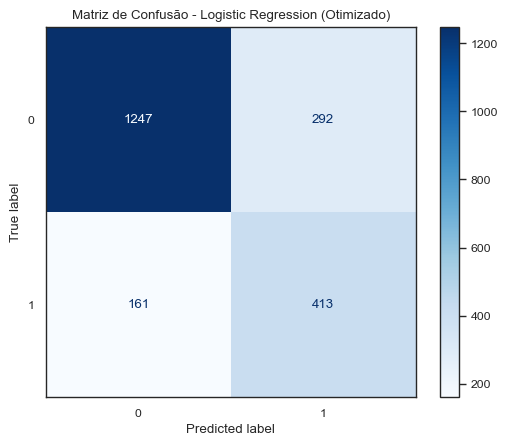

In [91]:
# Melhor modelo
best_model = search.best_estimator_

# Ajuste final no conjunto de treino
best_model.fit(X_train, y_train)

# Previs√£o no conjunto de testes
y_pred = best_model.predict(X_test)

# Avalia√ß√£o dos resultados
print(classification_report(y_test, y_pred))
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred)))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de Confus√£o - Logistic Regression (Otimizado)")
plt.grid(False)
plt.show()

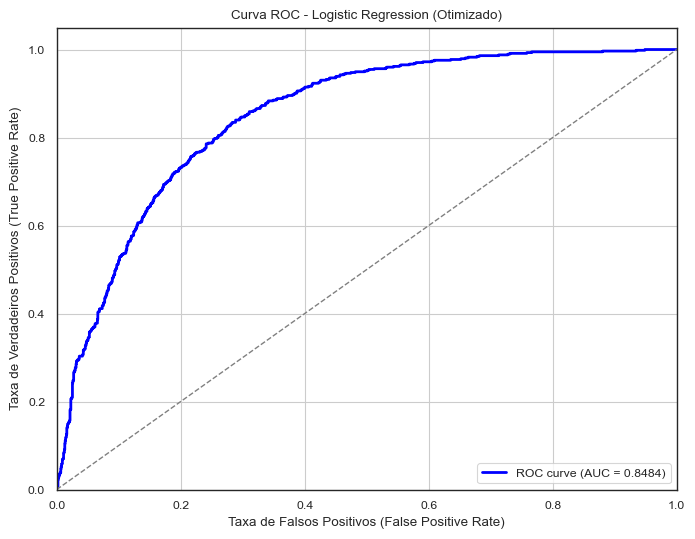

In [93]:
# Gerar as probabilidades para a classe positiva (churn)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC - Logistic Regression (Otimizado)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

üß† Interpreta√ß√£o t√©cnica:
1Ô∏è‚É£ Recall (classe 1): 0.72

Muito pr√≥ximo do recall de valida√ß√£o cruzada (~0.67), o que mostra boa generaliza√ß√£o.

üü¢ Acertou 413 de 574 churns (~72%) ‚ûî s√≥lido para churn prediction.

2Ô∏è‚É£ Precis√£o (classe 1): 0.59

1 falso positivo para cada 1.4 verdadeiro positivo.

‚ö†Ô∏è Normal para churn: melhor pegar mais churns (mesmo errando alguns) do que deixar churn passar.

3Ô∏è‚É£ Classe 0 (n√£o churn):

Muito forte: 1247 de 1539 acertos (81%).

4Ô∏è‚É£ AUC: 0.7649

Muito est√°vel e bom. Em churn datasets, AUC entre 0.75‚Äì0.8 j√° indica um modelo robusto.